Instructions: click restart and run all above. Figures will show once the entire notebook has finished running (will take a few minutes)

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import glob
import ipywidgets as widgets
from tqdm import tqdm
from membranequant import *
%matplotlib notebook

# Control quantification on N2 images

Performing control quantification on autofluorescence-corrected N2 images. As they contain no fluorescent protein, we should expect our method to return cytoplamic and membrane concentrations close to zero

### Import data

Importing a batch of N2 images. I will also import a set of PAR-2 Neon images, and quantify these together for comparison

In [2]:
path1 = '../test_datasets/dataset1_n2/'
path2 = '../test_datasets/dataset2_par2_neon/'
paths1 = direcslist(path1, 0)
paths2 = direcslist(path2, 0)
paths = paths1 + paths2

images = [load_image(path + '/af_corrected.tif') for path in paths]
rois = [np.loadtxt(path + '/ROI.txt') for path in paths]

### Run quantification

In [3]:
cytbg = np.loadtxt('saved_cyt_ref_profile.txt')
membg = np.loadtxt('saved_mem_ref_profile.txt')

iq = ImageQuant(images, roi=rois, thickness=50, periodic=True, rol_ave=20, iterations=1, lr=0.01, descent_steps=1000, uni_cyt=True, uni_mem=False, nfits=100, cytbg=cytbg, membg=membg)


In [4]:
iq.run()

100%|██████████| 1000/1000 [00:34<00:00, 28.95it/s]

Time elapsed: 34.82 seconds 


In [5]:
res = iq.compile_res()

### View quantification

As expected, cytoplasmic and membrane concentrations are close to zero across all cells. On average we get ever so slightly positive cytoplasmic concentrations and ever so slightly negative membrane concentrations - this shouldn't be a problem

<IPython.core.display.Javascript object>


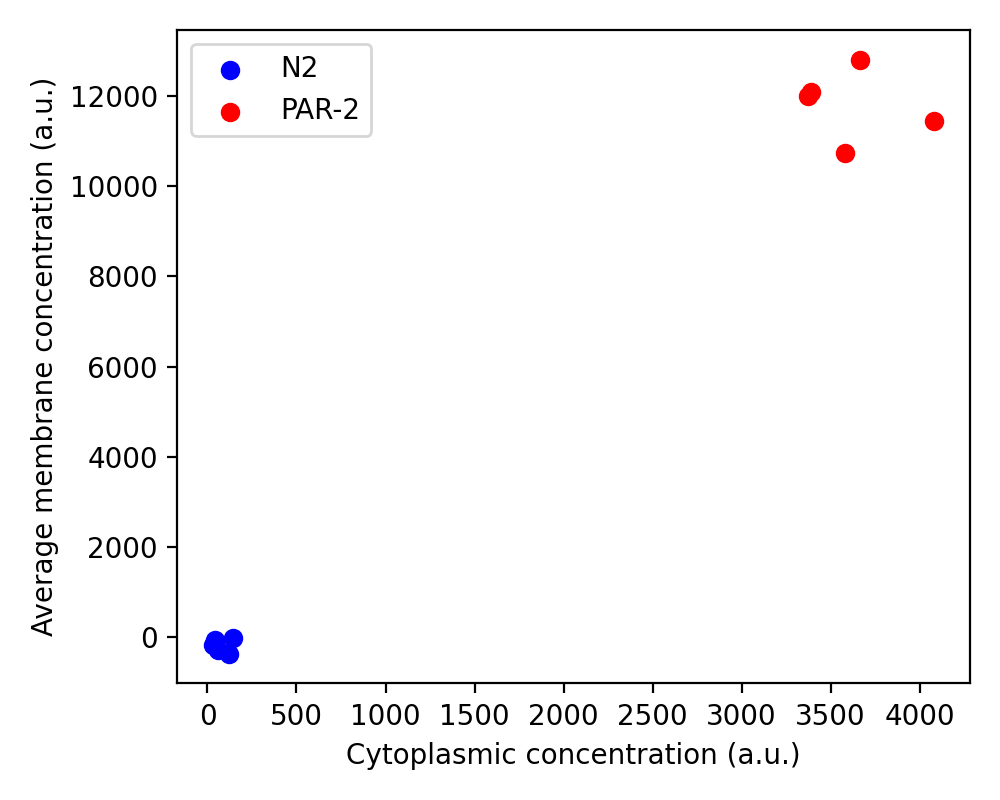

In [6]:
grouped = res.groupby('Frame')
mems = grouped.apply(lambda x: np.mean(x['Membrane signal']))
cyts = grouped.apply(lambda x: np.mean(x['Cytoplasmic signal']))

fig, ax = plt.subplots()
ax.scatter(cyts[:len(paths1)], mems[:len(paths1)], label='N2', c='b')
ax.scatter(cyts[len(paths1):], mems[len(paths1):], label='PAR-2', c='r')
ax.set_xlabel('Cytoplasmic concentration (a.u.)')
ax.set_ylabel('Average membrane concentration (a.u.)')
ax.legend()
fig.set_size_inches(5, 4)
fig.tight_layout()

<IPython.core.display.Javascript object>


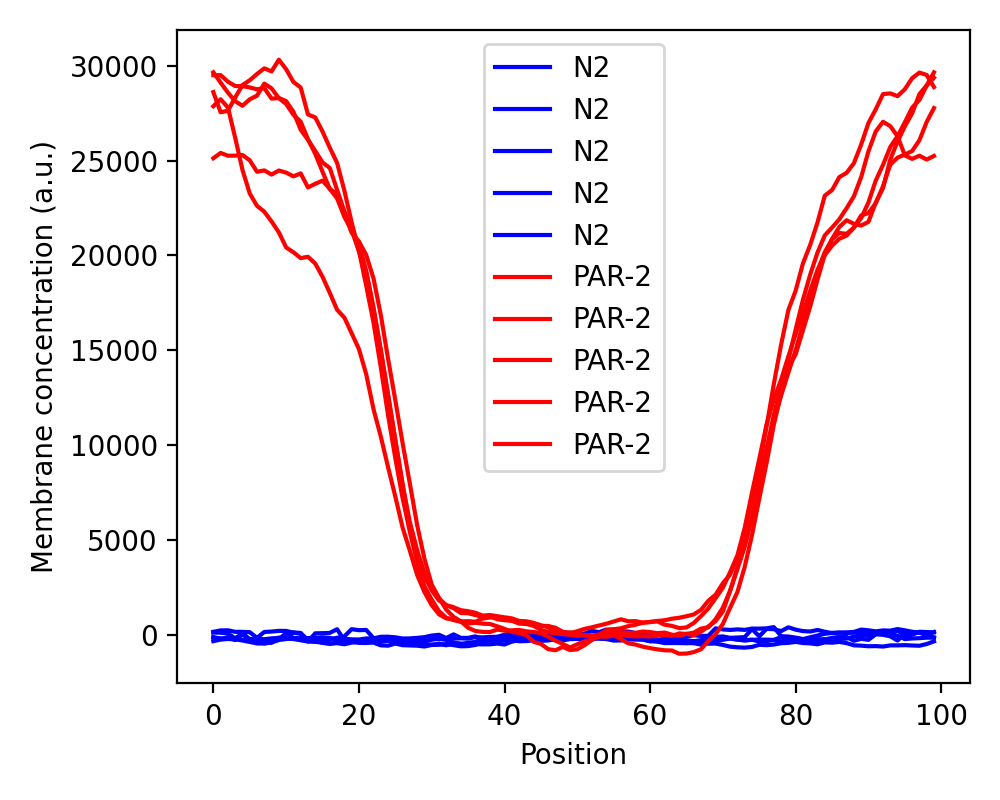

In [7]:
grouped = res.groupby('Frame')
mems = grouped.apply(lambda x: x['Membrane signal']).to_numpy()

fig, ax = plt.subplots()
ax.plot(mems[:len(paths1)].T, label='N2', c='b')
ax.plot(mems[len(paths1):].T, label='PAR-2', c='r')
handles, labels = ax.get_legend_handles_labels()
ax.legend()
ax.set_xlabel('Position')
ax.set_ylabel('Membrane concentration (a.u.)')
fig.set_size_inches(5, 4)
fig.tight_layout()